In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.io as sio
import h5py

In [3]:
data = h5py.File('traffic.mat')

In [4]:
data.keys()

[u'traffic']

In [5]:
traffic =data['traffic']
traffic.keys()
traffic['Ycoo']

<HDF5 dataset "Ycoo": shape (3, 10169280), type "<f8">

In [6]:
traffic= traffic['Ymat']


In [7]:
traffic.shape

(10560, 963)

In [8]:
traffic = np.array(traffic)

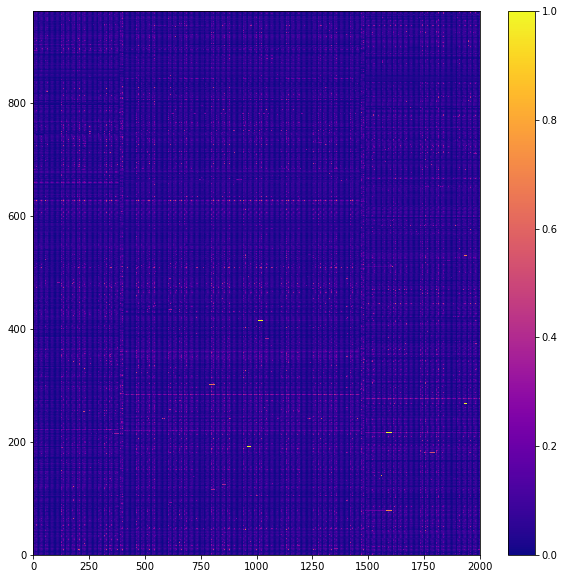

In [9]:
figure(figsize=[10,10])
pcolormesh(traffic[0:2000,:].T,cmap='plasma')
colorbar()

In [10]:
feat_matr = np.matmul(traffic.T,traffic)
U1,S1,V1 = np.linalg.svd(feat_matr)

In [11]:
time_matr = np.matmul(traffic,traffic.T)
U2,S2,V2 = np.linalg.svd(time_matr)

In [12]:
S1

array([  3.89901755e+04,   1.42124601e+03,   8.53122692e+02,
         6.76312105e+02,   5.49671491e+02,   4.94930697e+02,
         3.24844736e+02,   2.60370273e+02,   2.39563751e+02,
         2.10882581e+02,   1.46330531e+02,   1.41887976e+02,
         1.27732967e+02,   1.14116847e+02,   9.81131685e+01,
         9.22732969e+01,   8.41431388e+01,   7.75878342e+01,
         7.59443719e+01,   7.18243579e+01,   7.07475573e+01,
         6.38894622e+01,   5.96916972e+01,   5.79461749e+01,
         5.63182936e+01,   5.36422671e+01,   5.15770983e+01,
         5.08106021e+01,   5.06226801e+01,   4.70215945e+01,
         4.52964563e+01,   4.47257292e+01,   4.41315444e+01,
         4.18744102e+01,   4.06433749e+01,   3.99381192e+01,
         3.92728738e+01,   3.82168861e+01,   3.76816563e+01,
         3.65752559e+01,   3.57407190e+01,   3.43837622e+01,
         3.39851599e+01,   3.38270707e+01,   3.29915441e+01,
         3.19927878e+01,   3.10559602e+01,   3.05661003e+01,
         3.00756737e+01,

In [13]:
S2

array([  3.89901755e+04,   1.42124601e+03,   8.53122692e+02, ...,
         3.89004207e-12,   1.17134518e-12,   5.19875451e-14])

In [48]:
sv = S1[0:50]

In [49]:
SV =np.diag(sv)

In [50]:
U1.shape

(963, 963)

In [51]:
Up = U1[:,0:50]

In [52]:
VpT = U2[:,0:50].T

In [53]:
T = np.matmul(Up,SV)

In [54]:
Approx = np.matmul(T,VpT)

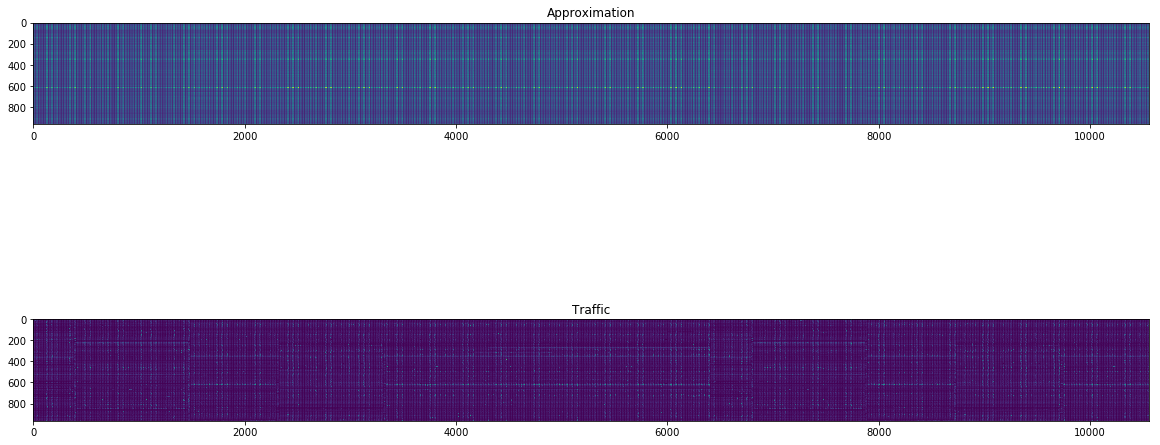

In [55]:
figure(figsize=[20,10])
subplot(2,1,1)
imshow(Approx)
title('Approximation')
subplot(2,1,2)
imshow(traffic.T)
title('Traffic')

In [56]:
U2.shape

(10560, 10560)

In [57]:
Approx.shape

(963, 10560)

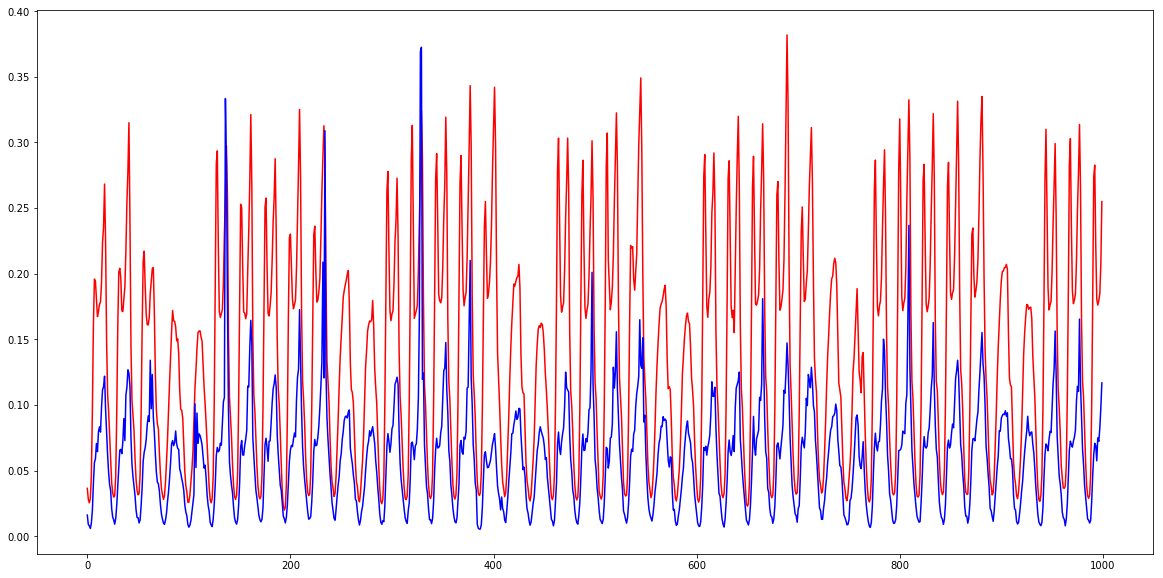

In [69]:
figure(figsize=[20,10])
plot(Approx[600,0:1000]/100,'r')
plot(traffic[0:1000,600],'b')

In [42]:
traffic.shape

(10560, 963)

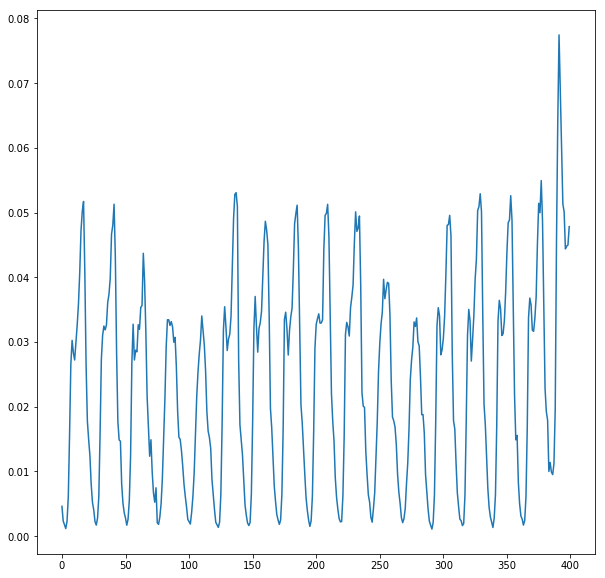

In [44]:
figure(figsize=[10,10])
plot(traffic[0:400,400])

In [45]:
25/.08

312.5